<a href="https://colab.research.google.com/github/SmurZik/Telecom/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведём импорт необходимых файлов

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, read_wave, Spectrum, Wave

--2024-04-06 12:19:53--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-04-06 12:19:54--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.006s  

2024-04-06 12:19:54 (7.82 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# Упражнение 5.1

Блокнот Jupyter этой главы, chap05.ipynb, содержит приложение, в котором можно вычислить автокорреляции для различных lag. Оцените высоты тона вокального чирпа для нескольких времён сегмента.

Импортируем требуемый звуковой файл

In [2]:
if not os.path.exists('28042__bcjordan__voicedownbew.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav


--2024-04-06 12:21:46--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/28042__bcjordan__voicedownbew.wav [following]
--2024-04-06 12:21:47--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/28042__bcjordan__voicedownbew.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125996 (123K) [audio/wav]
Saving to: ‘28042__bcjordan__voicedownbew.wav’

28042__bcjordan__vo 100%[===================>] 123.04K  --.-KB/s    in 0.02s   

2024-04-06 12:21:47 (7.47 MB/s)

Прослушаем звук:

In [3]:
from thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

Выделим три сегмента данного звука

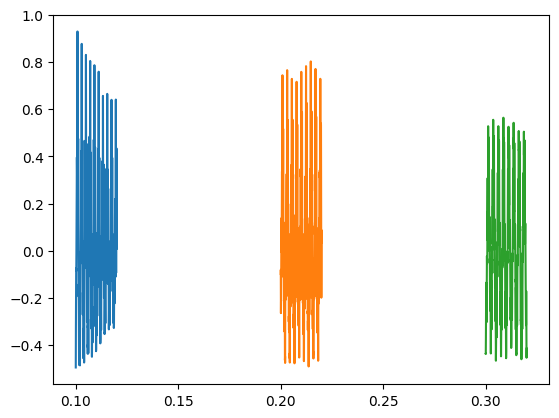

In [5]:
duration = 0.02
segment1 = wave.segment(start=0.1, duration=duration)
segment1.plot()
segment2 = wave.segment(start=0.2, duration=duration)
segment2.plot()
segment3 = wave.segment(start=0.3, duration=duration)
segment3.plot()

И вычислим lag:

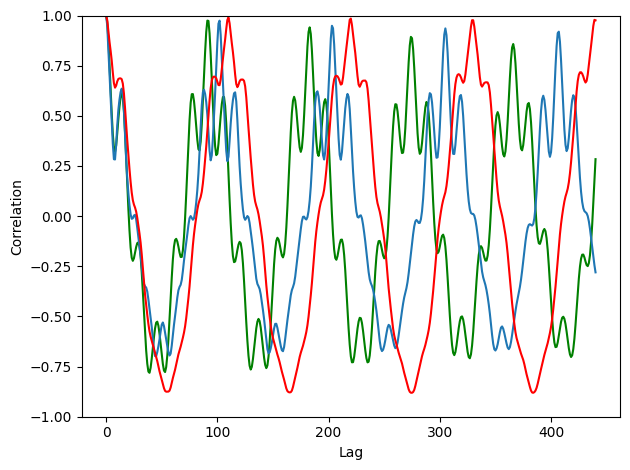

In [7]:
def serial_corr (wave, lag=1):
  N = len (wave)
  y1 = wave.ys[lag:]
  y2 = wave.ys[:N-lag]
  corr = np.corrcoef(y1, y2)[0, 1]
  return corr

def autocorr (wave):
  lags = range(len(wave.ys)//2)
  corrs = [serial_corr(wave, lag) for lag in lags]
  return lags, corrs

lags1, corrs1 = autocorr(segment1)
plt.plot(lags1, corrs1, color='green')
decorate(xlabel='Lag', ylabel='Correlation', ylim=[-1, 1])

lags2, corrs2 = autocorr(segment2)
plt.plot(lags2, corrs2)
decorate(xlabel='Lag', ylabel='Correlation', ylim=[-1, 1])

lags3, corrs3 = autocorr(segment3)
plt.plot(lags3, corrs3, color='red')
decorate(xlabel='Lag', ylabel='Correlation', ylim=[-1, 1])

Для оценки высоты тона вокального чирпа будем использовать argmax:

In [8]:
low, high = 50, 200
lag1 = np.array(corrs1[low:high]).argmax() + low

low, high = 50, 200
lag2 = np.array(corrs2[low:high]).argmax() + low

low, high = 50, 200
lag3 = np.array(corrs3[low:high]).argmax() + low

lag1, lag2, lag3

(91, 102, 110)

Перейдем от индексов ко времени в секундах:

In [9]:
period1 = lag1 / segment1.framerate
period2 = lag2 / segment2.framerate
period3 = lag3 / segment3.framerate
period1, period2, period3

(0.0020634920634920637, 0.0023129251700680273, 0.002494331065759637)

Зная время, вычислим частоту:

In [10]:
frequency1 = 1 / period1
frequency2 = 1 / period2
frequency3 = 1 / period3
frequency1, frequency2, frequency3

(484.6153846153846, 432.35294117647055, 400.90909090909093)

# Упражнение 5.2
Пример кода в chap05.ipynb показывает, как использовать автокорреляцию для оценки основной частоты периодического сигнала. Инкапсулируйте этот код в функцию, названную estimate_fundamental, и исользуйте её для отслеживания высоты тона записанного звука.

Проверьте, насколько хорошо она работает, накладывая оценки высоты тона на спектограмму записи.

Для простоты будем исползовать тот же звук, что в прошлом задании. Сперва посмотрим на изначальную спектограмму, чтобы позже можно было бы их сравнить

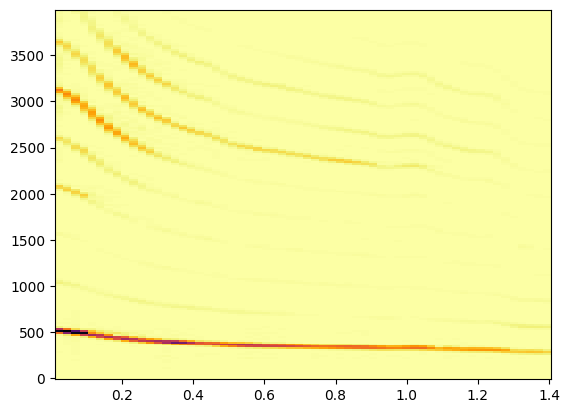

In [11]:
wave.make_spectrogram(2048).plot(high=4000)

Напишем требуемую функцию:

In [14]:
def estimate_fundamental(segment, low=70, high=150):
  lags, corrs = autocorr(segment)
  lag = np.array(corrs[low:high]).argmax() + low
  period = lag / segment.framerate
  frequency = 1 / period
  return frequency

In [15]:
estimate_fundamental(segment1)

484.6153846153846

Чтобы провести оценку высоты тона разделим на сегменты:

In [16]:
duration = wave.duration
step = 0.02
start = 0
time = []
freq = []
while start + step < duration:
  time.append(start + step/2)
  freq.append(estimate_fundamental(wave.segment(start=start,duration=step)))
  start += step

Выведем полученную спектограмму и увидим наложение

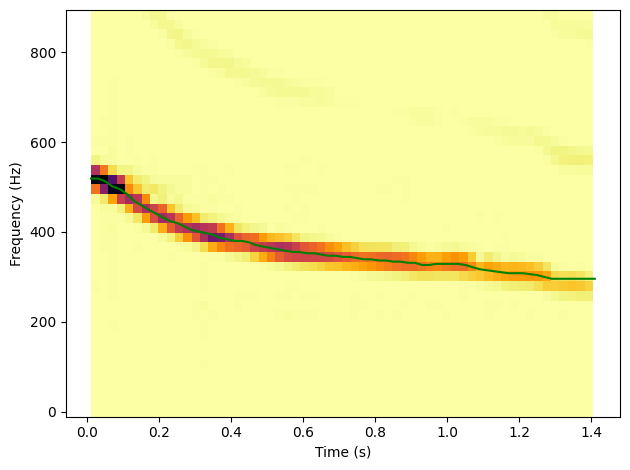

In [17]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(time, freq, color='green')
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

# Упражнение 5.3
Для упражнений в предыдущей главе были нужны исторические цены BitCoins, и надо было оценить спектр мощности изменения цен. Используя те же данные, вычислите автокорреляции цен в платёжной системе Bitcoin. Быстро ли спадает автокорреляционная функция? Есть ли признаки периодичности процесса?

In [18]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/TrombBone/TelecomLabs/raw/main/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv


--2024-04-06 12:43:28--  https://github.com/TrombBone/TelecomLabs/raw/main/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TrombBone/TelecomLabs/main/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2024-04-06 12:43:28--  https://raw.githubusercontent.com/TrombBone/TelecomLabs/main/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.01s   

2024-04-06 1

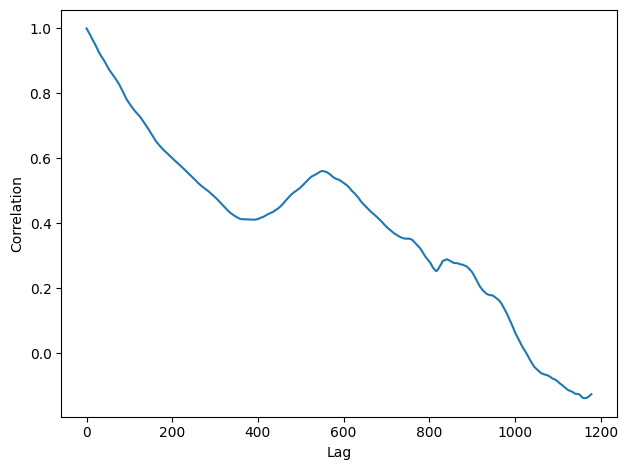

In [19]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
ys = df['Closing Price (USD)']
ts = df.index

w = Wave(ys, framerate=1)
lags, corrs = autocorr(w)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

Можем увидеть, что автокорреляционная функция спадает довольно быстро. Признаков периодичности у процесса нет, так как присутствуют резкие спады.

# Упражнение 5.4
В репозитории этой книги есть блокнот Jupyter под названием saxophone.ipynb, в котором исследуются автокорреляция, восприятие высоты тона и явление, называемое подавленная основная. Прочтите этот блокнот и «погоняйте» примеры. Выберите другой сегмент записи и вновь поработайте с примерами.

In [20]:
if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav


--2024-04-06 12:51:00--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav [following]
--2024-04-06 12:51:00--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2071600 (2.0M) [audio/wav]
Saving to: ‘100475__iluppai__saxophone-weep.wav’

100475__iluppai__sa 100%[===================>]   1.98M  --.-KB/s    in 0.04s   

2024-04-06 12:51:01 (4

In [21]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

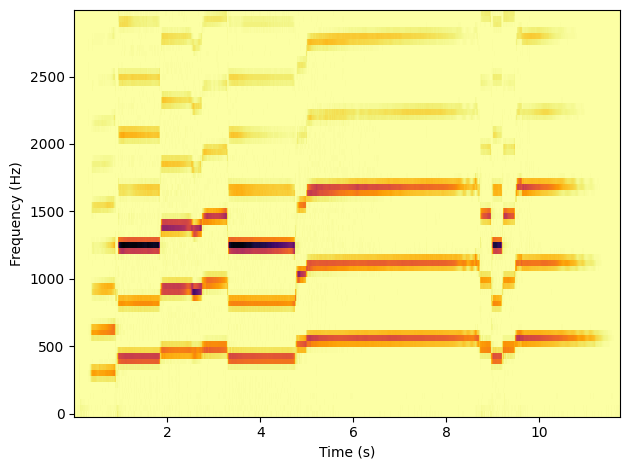

In [22]:
spectrogram = wave.make_spectrogram(seg_length=1024)
spectrogram.plot(high=3000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

На данной спектограмме можем увидеть гармоническую структуру во времени

In [27]:
segment = wave.segment(start=3, duration=0.2)
segment.make_audio()

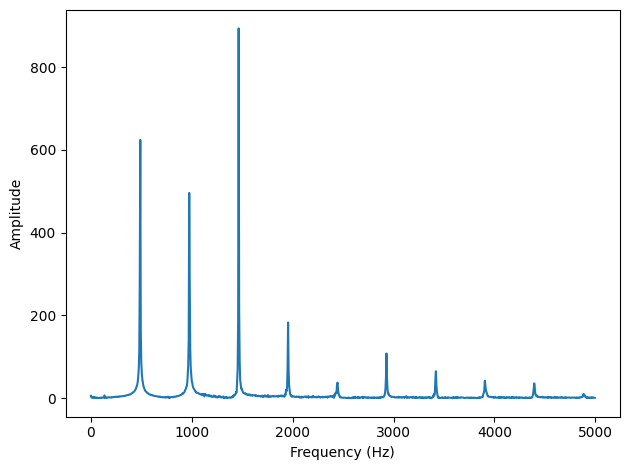

In [28]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Можно увидеть, что спектр довольно похож на прямоугольный сигнал

In [29]:
spectrum.peaks()[:10]

[(893.1571731035834, 1465.0),
 (623.9483370190854, 490.0),
 (496.01150887217756, 975.0),
 (300.84180735539553, 485.0),
 (283.0406580692698, 980.0),
 (211.4624624074501, 1470.0),
 (188.181328688786, 1460.0),
 (182.92183475020067, 1955.0),
 (159.62690907519874, 495.0),
 (140.7065547119859, 970.0)]

In [31]:
from thinkdsp import TriangleSignal

TriangleSignal(freq=415).make_wave(duration=0.2).make_audio()

Сравним с треугольным сигналом. Для понимания процесса восприятия основной частоты используем АКФ:

In [32]:
def autocorr2(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

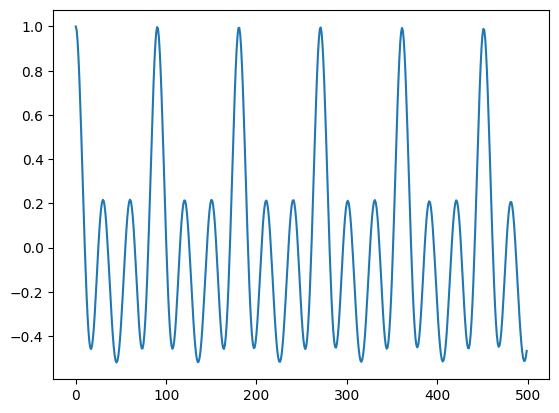

In [33]:
corrs = autocorr2(segment)
plt.plot(corrs[:500])

In [34]:
estimate_fundamental(segment)

489.99999999999994

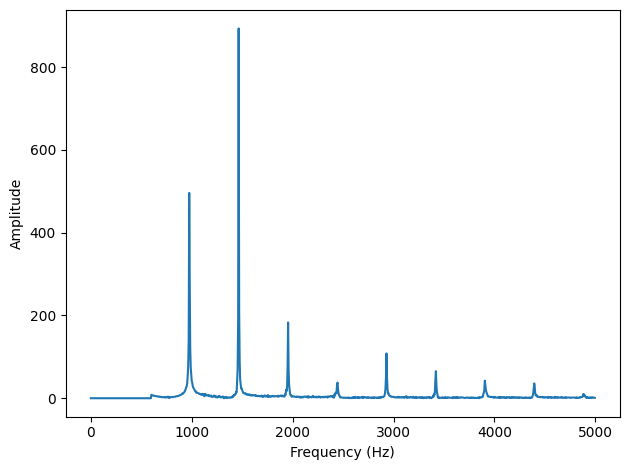

In [35]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(600)
spectrum2.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Когда мы убрали основную частоту, то получили очень похожий спектр на прошлый звук.

In [36]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

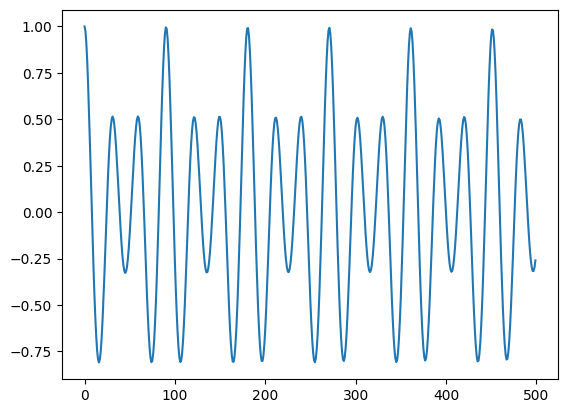

In [37]:
corrs = autocorr2(segment2)
plt.plot(corrs[:500])

In [38]:
estimate_fundamental(segment2)

489.99999999999994

Мы слышим частоту, которой нет, потому что более высокие компоненты сигнала являются гармониками 490 Гц. Восприятие высоты тона основано не только на спектральном анализе, но и на вычислении АКФ.